# The Basic OLG model

The OLG model is one of two main analytical frameworks for analyzing the basic intertemporal choice, consumption vs saving. 

OLG is set to capture potential interaction of different generations of individuals in the marketplace hence, providing a tractable alternative to the infinite-horizon economic models

Imports and set magics:

In [20]:
import numpy as np
from scipy import optimize
import sympy as sm
import matplotlib.pyplot as plt
import math as m 
from scipy import stats as st
from scipy.optimize import fsolve
import time      
#As we are using a lot of theory in this project, we want the equations to be presented well, why we import the init_session
from sympy import init_session
init_session() 

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# local modules
import modelproject

IPython console for SymPy 1.5.1 (Python 3.7.6-64-bit) (ground types: python)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.5.1/

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Model description

In this model, we consider a static economy with an infinite number og households, $i \in N$ 
In addition, population grows at a constant rate, 

$L_{t}=L_{t-1}(1+n)$


Time, t, is discrete and runs to infinity and individuals born at time t live for the period $t$ til $t+1$, meaning the individuals are grouped in two generations, young and old. 

We assume a general, separable utility function for the individuals given by 

$U_t=u(c_{1t})+u(c_{2t+1})(1/(1+\beta))$

$\beta$ is added as a discount factor of the time-horizon. 

Production side is given by competitive firms and a CRS aggregate production function meaning we have the following production criterias
$Y_{t}=F(K_{t},L__{t})$

$r_{t}=f'(k_{t})$

$w_{t} = f(k_{t})-k_{t}f'(k_{t})$

$\bullet$ NOTE: $k_{t}=K_{t}/L_{t}$

The savings by an individual of a generation is determined as a solution to

$max U_{t}$ s.t.

$w_{t}=s_{t}+c_{1t}$  

$c_{2t+1}=s_{t}(1+r_{t+1})$

Where $c_{1t}$ is consumption of the individual born at t when young at date t and $c_{2t+1}$ consumption when old at date t+1. In this model, the setup is built such that the old individuals will rent their savings of time t as capital to firms at  t+1. Therefore they will eventually receive a gross rate of return given by $(1+r_{t})$. The second consumption constraint incorporates the fact that the individual will consume all his life-earnings. Hence, the lifetime constraint is given by

$w_{t}=c_{1+t}+c_{2t+1}/(1+r_{t+1})$



# Solution of the household problem


The solution is found by setting up the Lagrangian

$L(c_{1t},c_{2t+1},\lambda)= u(c_{1t})+u(c_{2t+1})(1/1+\beta)+\lambda[w_{t}-c_{1t}-(c_{2t+1}/(1+r_{t+1}))]$

FOCs:

$u'(c_{1t})=\lambda$

$(1/(1+\beta))u'(c_{t2+1})= \lambda/(1+r_{t+1})$

combining the above to find the Euler equation:

$(1+r_{t+1})/(1+\beta)u'(c_{2t+1}) = u'(c_{1t})$

The interpretation of Euler is that if the consumer gives up one unit of consumption in the young state, the marginal cost will be given by $u'(c_{1t})$ and the marginal benefit will be $(1+r_{t+1})$ units of consumption in next period, when old.


Next, we want to find the **optimal savings path**:

This is done by substituting budget constrain into the Euler eq. above. Hence, we find

$(1+r_{t+1})/(1+\beta)u'(c_{2t+1}) = u'(c_{1t})$ $\rightarrow$ 

$(1+r_{t+1})/(1+\beta)u'((1+r_{t+1})s_{t})=u'(w_{t} - s_{t})$

where optimal savings are a function of wage and the interest rate. 

Knowing the decision of individuals, we can now examine the **Law of Motion** by aggregating the economy as follows:

As we are working with two periods, we know that the aggregate stock of capital at $t+1$ must equal the total savings of the economy at the time $t$ as well as the non-depreciated capital stock which is carried from $t$ and the 'dissavings' of same period.

This means, the aggregate capital level at time $t+1$ is given by the following:

$K_{t+1}=S_{t}+(1-\delta)K_{t}-K_{t}$ $\rightarrow$

$K_{t+1}=S_{t}-\delta K_{t}$

Remember, $k_{t} \equiv K_{t}/L_{t}$. Hence,

$k_{t+1}(1+n) = s_{t}-\delta k_{t}$

In short, inserting the findings above into the capital accumulation and for simplicity setting $\delta =0$ we now have the law of motion per worker in the entire economy defined by

$k_{t+1} (1+n)=s(f(k_{t})-f'(k_{t})k_{t}, f'(k_{t+1}))$


Now, we wish to solve the model using **sympy**

In [21]:
#First, defining the setting, here the variables we want to use

#Households
beta = sm.symbols('beta')
c1 = sm.symbols('c_{1t}')
c2 = sm.symbols('c_{2t+1}')
lmbda = sm.symbols('lambda')
#Savings
r = sm.symbols('r_{t+1}')
w = sm.symbols('w_t')
#Capital stock
s = sm.symbols('s_t')
kt = sm.symbols('k_t')
k1 = sm.symbols('k_{t+1}')
delta = sm.symbols('delta')
n = sm.symbols('n')




Now, we want to define the utility function. In this case, we use the log utility

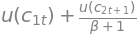

In [22]:
#We start by setting a standard utility, then we specify the form afterwards

u_std = sm.Function('u')

def log_u(c):
    return sm.log(c)


def U(c1, c2, beta, u):
    return u(c1) + 1 / (1 + beta) * u(c2)

U(c1, c2, beta, u = u_std)

Now, the budget constraints are set up to calculate the intertemporal consumption constraint

In [23]:
#Defining budget constraints
c_1budget = sm.Eq(w, c1 + s)
c_2budget = sm.Eq(c2, (1+r)*s)

#Printing the budget constraints
c_1budget, c_2budget


In [24]:
Next, we define the intertemporal consumption constraints

SyntaxError: invalid syntax (<ipython-input-24-1c3cb59d6c5f>, line 1)

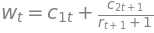

In [25]:
#Intertemporal consumption constraint defined
ib = c_1budget.subs(s, sm.solve(c_2budget, s)[0])
#Print intertemporal budget constraint
ib

Setting up the Lagrangian, deriving FOCs

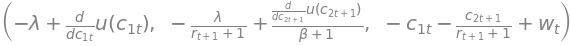

In [26]:
#Lagrangian
l = U(c1,c2,beta, u = u_std) - lmbda *  (ib.rhs - w)

#Print Lagrangian
l

#Deriving FOCs
dc1    = sm.diff(l, c1) 
dc2    = sm.diff(l, c2) 
dlmbda = sm.diff(l, lmbda)
#Print FOCs
dc1, dc2, dlmbda

Now we find the **Euler Equation**

In [27]:
#Defining the Euler Equation
def euler_equation(dc1, dc2, u, c1, lmbda):
    x = dc2.subs(lmbda, sm.solve(dc1, lmbda)[0])

    euler_eq = sm.Eq(sm.Derivative(u(c1)),
                     sm.solve(x, sm.Derivative(u(c1)))[0]
                    )
    return euler_eq 

#Calling make_euler_equation to calculate the Euler eq
euler = euler_equation(dc1, dc2, u = u_std, c1 = c1, lmbda = lmbda)

#Printing result
euler

euler = euler.subs(c1, w - s).subs(c2, c_2budget.rhs)
#Printing result
euler


                                                     ⎛    d                 ⎞│
                                       (r_{t+1} + 1)⋅⎜─────────(u(c_{2t+1}))⎟│
⎛   d              ⎞│                                ⎝dc_{2t+1}             ⎠│
⎜───────(u(c_{1t}))⎟│                = ───────────────────────────────────────
⎝dc_{1t}           ⎠│c_{1t}=-sₜ + wₜ                                β + 1     

                         
                         
c_{2t+1}=sₜ⋅(r_{t+1} + 1)
─────────────────────────
                         

Euler implicitly determines the value of $s_{t}$. 

Now we want to determine the development in capital.  

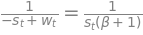

In [28]:
#First we set the functional form of $u_{t}$ using the $log$ function as this enables for further examination. 
euler = euler.replace(u_std, log_u).doit()
#Print
euler


Now we define the values and setting for the **firms** in the economy.
To do this, we explore the aggregate production function, normalizing this by using the per capita function as this enables us to better calculate expressions for **interest rates** and **wages** in equilibrium. 

In [29]:
#Production function
Y = sm.symbols('Y_t')
K = sm.symbols('K_t')
L = sm.symbols('L_t')
#including y_t and alpha
y = sm.symbols('y_t')
alpha = sm.symbols('alpha')
#deriving the production function by using the values above

prod_f = sm.Eq(Y,K**alpha * L**(1-alpha))

#Normalizing
normprod_f = sm.Eq(y, kt**alpha)
#Print
normprod_f

In [30]:
ir = sm.Eq(r, sm.Derivative(normprod_f.rhs, kt)).doit()
w_t = sm.Eq(w, normprod_f.rhs - kt*sm.Derivative(normprod_f.rhs, kt)).doit()

#Print results of interest rate and wage
ir, w_t

Solving for capital period t+1(capital evolution path)

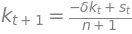

In [31]:
k_1 = sm.Eq(k1, 1/(1+n)* (s - delta*kt) )
#Print 
k_1

We now derive the **transition path** as follows

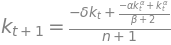

In [32]:
k_sav = sm.solve(euler, s)[0].subs(w, w_t.rhs)
# Substituting 
if r in k_sav.atoms():
    k_sav = k_sav.subs(r, ir.rhs)

    
t_path = k_1.subs(s, k_sav)
#Print
t_path

To make a visualization of the transition path, we now specify a number of parameters and define a function of the transition path

In [33]:
#Defining the transition path
transition_curve = sm.lambdify((kt, beta, delta, n, alpha,r ), t_path.rhs)
def transition_c(kt, beta, delta,alpha, n, r = 0):
    return transition_curve(kt, beta, delta, alpha, n, r)
#Defining equilibrium
eq = sm.lambdify((beta, delta, alpha, n),sm.solve(t_path.subs(k1, kt), kt)[0])
def eqm(beta, delta,alpha, n,):
    return eq(beta, delta, alpha, n)




Letting alpha vary to show how this affects the transition path

In [34]:
#Defining variables
ex = np.linspace(0,3,1000)
_b = 0.05
_d = 0.02
_n = 0.2
#Plotting figure
plt.figure(figsize=(14,7))
#Plot 45 degree line
plt.plot(ex, ex, color = 'blue')
#Defining moving function
for _a in np.linspace(0.01, 0.2,5):
    sol = [transition_c(kt = x, alpha = _a, beta = _b, delta = _d, n = _n) for x in ex]
    ks = eqm(alpha = _a, beta = _b, n = _n, delta = _d)
    plt.plot(ex, sol, color = 'red', alpha = 1)    
    plt.annotate(f'$\\alpha$={round(_a,2)}', xy= (ks + 0.01, ks - 0.01))
#Standard settings 
plt.xlabel('$k_t$', size =15)
plt.ylabel('$k_{t+1}$', size=15)
plt.title('Transition curves\n', size = 20)
plt.xlim(0,0.4)
plt.ylim(0,0.4)


To further characterize the equilibrium paths, we construct the transition diagram in the plane $(k_{t},k_{t+1})$ examining the convergence towards **steady state**

In [47]:
#Setting variable values
_r = 0.05
_d = 0.05
_a = 0.5

#Defining k steady state
ksteady = 0.0002
ex = range(8)
ex2 = np.linspace(0,1,500)
#Transition
out = list()
for _ in ex:
    ksteady = transition_c(kt = ksteady, alpha = _a, beta = _b, delta = _d, n = _n)
    out.append(ksteady)



In [50]:
res = [transition_c(kt = x, alpha = _a, beta = _b, delta = _d, n = _n) for x in ex2]
#Plotting figure
plt.figure(figsize=(14,7))
#Plot 45 degree line
plt.plot(ex, ex, color = 'blue')
#Plotting the steady state convergence line
plt.plot(ex2, res, color = 'red', alpha = 1)    
plt.step(out[:-1], out[1:], where = 'post', color = 'green', linestyle = '--', alpha = 0.8)
plt.scatter(out[:-1], out[1:], color = 'red', alpha = 0.8)
#Standard settings
plt.xlabel('$k_t$', size = 15)
plt.ylabel('$k_{t+1}$', size = 15)
plt.xlim(0,0.2)
plt.ylim(0,0.2)
plt.title('Convergence towards steady state\n', size = 20)


Text(0.5, 1.0, 'Convergence towards steady state\n')

# Extended OLG model

Now we add a government to our model. The government collects taxes on both capital and labour. Taxes are given by $\tau$.

We now consider the household problem 

$max$           $u(c_{2t+1})+\beta u(c_{1t})$

s.t.

$c_{2t+1}+s=(1-\tau)w+t_{2t+1}$

$c_{1t}=R+t_{1t}$

where $R$ is the after-tax gross interest rate which is given by

$R=(1+(1-\tau)r)$

Instead of having to substitute and solve for an equation of one unknown, as we did in the beginning, we now want to use the **Gauss-Seidl** method for solving the problem. 

Using this method, we start with an initial guess of the kapital in time 1t, denoted $K_{guess}$. 
Next, we solve for the parameters $q, w and R$

$q = \alpha AK^{\alpha-1}_{1t} L^{1-a}$

$w=(1-\alpha)K^{\alpha}_{1t} L^{1-\alpha}$

$R=1+(1-\tau)(q-\delta)$

We then solve for $s*$ which is the optimal savings of the household, given by

$s* =N_{2t+1} ((\beta R((1-\tau)w+t_{2t+1})-t_{1t})/((1+\beta)R))$

Next, we aggregate over all households of the economy to find $K_{new}$ 

$K_{new}=N_{2t+1} \bullet s*$

Lastly, we calculate errors and update capital as follows

$K_{guess} = \lambda K_{new} +(1-\lambda)K_{guess}$ where $0< \lambda <1$ is an updating parameter.

In [45]:
#Set parameters
A       = 1
alpha   = 0.33
beta    = 0.8
delta   = 0.0
L       = 1
N_2     = 1.0
N_1     = 1.0
tau_L   = 0.22
tau_K   = 0.16
t_2     = 0.0
t_1     = 0.0
#



#Initial guess of capital
error       = 100
guess_lmda  = 0.4   
K_guess     = 0.4
iter        = 1
while (iter<200) or (error>0.001):
    # Now we want to solve for q and w by
    q = alpha*A*K_guess**(alpha-1)
    w = (1-alpha)*A*K_guess**alpha
    R = 1 + (1-tau_K)*(q - delta)
    K_new = N_2* (beta*R*((1-tau_L)*w + t_2) - t_1)/((1+beta)*R)
    # Calculate discrepancy between old and new capital stock
    error = abs(K_guess-K_new)/K_guess
    # Update capital stock
    K_guess    = guess_lmda*K_new + (1-guess_lmda)*K_guess
    iter = iter +1


#Results and print
Ks = K_new
qs = q
Rs = R
rs = qs - delta
ws = w
Ys = A*Ks**alpha*L**(1-alpha)
print('K* = ' , Ks)
print('q* = ' , qs)
print('R* = ' , Rs)
print('r* = ' , rs)
print('w* = ' , ws)
print('Y* = ' , Ys)

K* =  0.1131649073144145
q* =  1.4207807118254876
R* =  2.1934557979334093
r* =  1.4207807118254876
w* =  0.3264372326377341
Y* =  0.48721975020557334


Now we want to find solutions for the entire economy

In [46]:
#Household optimal consumption per period
ss = Ks/N_2
c2s= (1-tau_L)*ws + t_2 - ss
c1s= Rs*ss + t_1

# Residual consumption of the government
Gs = N_2*tau_L*ws + N_1*tau_K*rs*ss

# Finally, aggregate the consumption of the household
Cs = N_2*c2s + N_1*c1s

# To ensure, the above holds, we run a fast check on the condition of the goods market and resoure constraint
ARC = Ys - delta*Ks - Cs - Gs


print("The results using the Gauss-Seidl method are as follows")

print("K* = {:6.4f}".format(Ks))
print("q* = {:6.4f}".format(qs))
print("r* = {:6.4f}".format(rs))
print("R* = {:6.4f}".format(Rs))
print("w* = {:6.4f}".format(ws))
print("Y* = {:6.4f}".format(Ys))
print("-------------------------")
print("ARC = {:6.4f}".format(ARC))
print("Number of iterations = " +str(iter))
print("-------------------------")
print("Optimal consumption of the household is:")
print("s* = ", ss)
print("c1* = ", c1s)
print("c2* = ", c2s)
print("Whereas the residual consumption of the government is:")
print("G* = ", Gs)
print("And the aggregate consumption of the household is:")
print("C* = ", Cs)


The results using the Gauss-Seidl method are as follows
K* = 0.1132
q* = 1.4208
r* = 1.4208
R* = 2.1935
w* = 0.3264
Y* = 0.4872
-------------------------
ARC = 0.0000
Number of iterations = 200
-------------------------
Optimal consumption of the household is:
s* =  0.1131649073144145
c1* =  0.24822222207139938
c2* =  0.14145613414301814
Whereas the residual consumption of the government is:
G* =  0.09754139399115577
And the aggregate consumption of the household is:
C* =  0.3896783562144175


# Conclusion